In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Check if the file exists
filename = "/content/csv_result-chronic_kidney_disease_full (1) (1).csv"  # Or provide the full path if it's in a different directory
if not os.path.exists(filename):
    print(f"Error: File '{filename}' not found. Please make sure it is in the same directory as this script or provide the correct path.")
    exit()

In [ ]:
import pandas as pd

try:
    df = pd.read_csv('csv_result-chronic_kidney_disease_full (1) (1).csv', on_bad_lines='skip')
    display(df.head())
    print(df.shape)
    print(df.info())
except FileNotFoundError:
    print("Error: File not found. Please ensure the file path is correct.")
except Exception as e:
    print(f"An error occurred: {e}")

,id,'age','bp','sg','al','su','rbc','pc','pcc','ba',...,'pcv','wbcc','rbcc','htn','dm','cad','appet','pe','ane','class'
0,1,48,80,1.020,1,0,?,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,2,7,50,1.020,4,0,?,normal,notpresent,notpresent,...,38,6000,?,no,no,no,good,no,no,ckd
2,3,62,80,1.010,2,3,normal,normal,notpresent,notpresent,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,4,48,70,1.005,4,0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,5,51,80,1.010,2,0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


(397, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 26 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       397 non-null    int64 
 1   'age'    397 non-null    object
 2   'bp'     397 non-null    object
 3   'sg'     397 non-null    object
 4   'al'     397 non-null    object
 5   'su'     397 non-null    object
 6   'rbc'    397 non-null    object
 7   'pc'     397 non-null    object
 8   'pcc'    397 non-null    object
 9   'ba'     397 non-null    object
 10  'bgr'    397 non-null    object
 11  'bu'     397 non-null    object
 12  'sc'     397 non-null    object
 13  'sod'    397 non-null    object
 14  'pot'    397 non-null    object
 15  'hemo'   397 non-null    object
 16  'pcv'    397 non-null    object
 17  'wbcc'   397 non-null    object
 18  'rbcc'   397 non-null    object
 19  'htn'    397 non-null    object
 20  'dm'     397 non-null    object
 21  'cad'    397 non-null    obje

In [ ]:
# Correct column names
new_columns = []
for col in df.columns:
    new_columns.append(col.replace("'", ""))
df.columns = new_columns

# Examine the shape of the DataFrame
print("DataFrame Shape:", df.shape)

# Identify data types and inconsistencies
print("\nData Types:")
print(df.dtypes)

# Check for missing values
missing_values = df.isin(['?']).sum()
missing_percentage = (missing_values / len(df)) * 100
print("\nMissing Values:")
print(missing_values)
print("\nMissing Value Percentages:")
print(missing_percentage)

# Analyze the distribution of the target variable
print("\nTarget Variable Distribution:")
print(df['class'].value_counts(normalize=True))

# Convert relevant columns to numerical dtypes for correlation analysis.
for col in ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Convert binary columns to numerical (0 and 1)
binary_columns = ["htn", "dm", "cad", "pe", "ane"]
for col in binary_columns:
    df[col] = df[col].map({'yes': 1, 'no': 0})

# Calculate correlations with target variable (excluding NaNs)
df['class'] = df['class'].map({'ckd': 1, 'notckd': 0})

numerical_cols = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc'] + binary_columns
correlations = df[numerical_cols + ['class']].corr()['class']

print("\nCorrelation with Target Variable:")
print(correlations)

DataFrame Shape: (397, 26)

Data Types:
id        int64
age      object
bp       object
sg       object
al       object
su       object
rbc      object
pc       object
pcc      object
ba       object
bgr      object
bu       object
sc       object
sod      object
pot      object
hemo     object
pcv      object
wbcc     object
rbcc     object
htn      object
dm       object
cad      object
appet    object
pe       object
ane      object
class    object
dtype: object

Missing Values:
id         0
age        9
bp        12
sg        47
al        46
su        49
rbc      150
pc        65
pcc        4
ba         4
bgr       43
bu        19
sc        17
sod       85
pot       86
hemo      52
pcv       70
wbcc     105
rbcc     130
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

Missing Value Percentages:
id        0.000000
age       2.267003
bp        3.022670
sg       11.838791
al       11.586902
su       12.342569
rbc      37.783375
p

In [ ]:
display(df)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,1,48.0,80.0,1.020,1.0,0.0,?,normal,notpresent,notpresent,...,44.0,7800.0,5.2,1.0,1.0,0.0,good,0.0,0.0,1
1,2,7.0,50.0,1.020,4.0,0.0,?,normal,notpresent,notpresent,...,38.0,6000.0,NaN,0.0,0.0,0.0,good,0.0,0.0,1
2,3,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,NaN,0.0,1.0,0.0,poor,0.0,1.0,1
3,4,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.9,1.0,0.0,0.0,poor,1.0,1.0,1
4,5,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.6,0.0,0.0,0.0,good,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,396,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47.0,6700.0,4.9,0.0,0.0,0.0,good,0.0,0.0,0
393,397,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54.0,7800.0,6.2,0.0,0.0,0.0,good,0.0,0.0,0
394,398,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49.0,6600.0,5.4,0.0,0.0,0.0,good,0.0,0.0,0
395,399,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51.0,7200.0,5.9,0.0,0.0,0.0,good,0.0,0.0,0


In [ ]:
import numpy as np

# Impute missing values
for col in df.columns:
    if df[col].dtype == 'object':
        # Impute categorical features with the mode
        df[col] = df[col].replace('?', np.nan)
        mode_val = df[col].mode()[0]
        df[col] = df[col].fillna(mode_val)
    else:
        # Impute numerical features with the median
        df[col] = pd.to_numeric(df[col], errors='coerce')
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)

# Convert data types
for col in ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']:
    df[col] = pd.to_numeric(df[col])
for col in ["htn", "dm", "cad", "pe", "ane"]:
    df[col] = df[col].astype(int)

# Handle inconsistencies (example: standardize capitalization)
for col in df.select_dtypes(include='object'):
  df[col] = df[col].str.lower()

# Remove duplicates
df.drop_duplicates(inplace=True)

display(df.head())
print(df.info())

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,1,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,...,44.0,7800.0,5.2,1,1,0,good,0,0,1
1,2,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,...,38.0,6000.0,4.8,0,0,0,good,0,0,1
2,3,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,4.8,0,1,0,poor,0,1,1
3,4,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.9,1,0,0,poor,1,1,1
4,5,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.6,0,0,0,good,0,0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      397 non-null    int64  
 1   age     397 non-null    float64
 2   bp      397 non-null    float64
 3   sg      397 non-null    float64
 4   al      397 non-null    float64
 5   su      397 non-null    float64
 6   rbc     397 non-null    object 
 7   pc      397 non-null    object 
 8   pcc     397 non-null    object 
 9   ba      397 non-null    object 
 10  bgr     397 non-null    float64
 11  bu      397 non-null    float64
 12  sc      397 non-null    float64
 13  sod     397 non-null    float64
 14  pot     397 non-null    float64
 15  hemo    397 non-null    float64
 16  pcv     397 non-null    float64
 17  wbcc    397 non-null    float64
 18  rbcc    397 non-null    float64
 19  htn     397 non-null    int64  
 20  dm      397 non-null    int64  
 21  cad     397 non-null    int64  
 22  ap

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Identify categorical columns (excluding 'id' and 'class')
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# One-hot encode categorical features
df_encoded = pd.get_dummies(df.drop(columns=['id', 'class']), columns=categorical_cols, drop_first=True)

# Identify numerical columns (excluding 'id' and the target variable 'class')
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
numerical_cols.remove('id')
numerical_cols.remove('class')

# Scale numerical features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numerical_cols]), columns=numerical_cols, index=df.index)

# Concatenate encoded categorical and scaled numerical features
df_final = pd.concat([df_encoded, df_scaled], axis=1)

display(df_final.head())


,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,pe,ane
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,138.0,4.4,...,-0.063954,1.056275,0.609835,-0.196503,0.553695,1.311174,1.393105,-0.306046,-0.482617,-0.421950
1,7.0,50.0,1.020,4.0,0.0,121.0,18.0,0.8,138.0,4.4,...,-0.063954,-0.453339,-0.126418,-0.907137,0.078158,-0.762675,-0.717821,-0.306046,-0.482617,-0.421950
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,138.0,4.4,...,-0.063954,-1.079276,-0.985380,-0.314942,0.078158,-0.762675,1.393105,-0.306046,-0.482617,2.369951
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,...,-0.735829,-0.490159,-0.862671,-0.630779,-0.991799,1.311174,-0.717821,-0.306046,2.072036,2.369951
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,4.4,...,-0.063954,-0.342879,-0.494545,-0.393901,-0.159610,-0.762675,-0.717821,-0.306046,-0.482617,-0.421950


In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (317, 25)
X_test shape: (80, 25)
y_train shape: (317,)
y_test shape: (80,)


--- Logistic Regression ---
Accuracy: 1.0
F1 Score: 1.0
Precision: 1.0
Recall: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        50

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



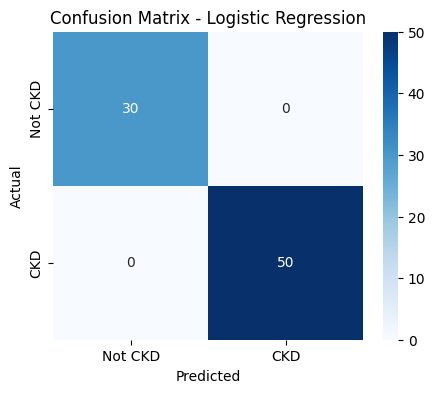

--- SVM ---
Accuracy: 1.0
F1 Score: 1.0
Precision: 1.0
Recall: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        50

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



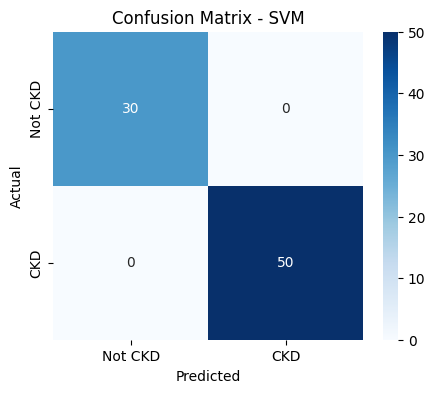

--- Random Forest ---
Accuracy: 1.0
F1 Score: 1.0
Precision: 1.0
Recall: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        50

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



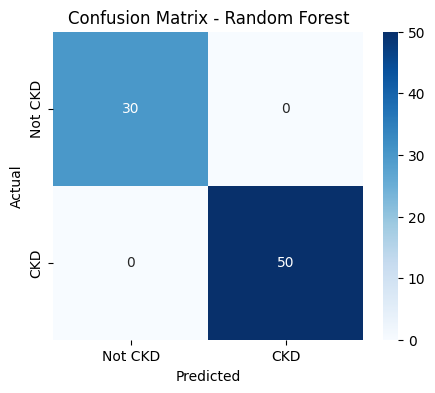

--- Gradient Boosting ---
Accuracy: 1.0
F1 Score: 1.0
Precision: 1.0
Recall: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        50

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



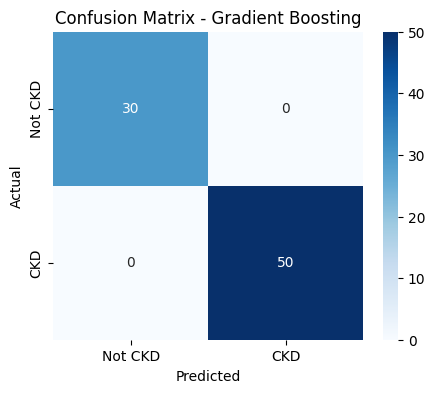

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report

# Initialize models
logreg_model = LogisticRegression(max_iter=1000)
svm_model = SVC()
rf_model = RandomForestClassifier()
gb_model = GradientBoostingClassifier()

# Train models
logreg_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# Make predictions
logreg_pred = logreg_model.predict(X_test)
svm_pred = svm_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
gb_pred = gb_model.predict(X_test)

# Evaluate models
models = {
    "Logistic Regression": logreg_pred,
    "SVM": svm_pred,
    "Random Forest": rf_pred,
    "Gradient Boosting": gb_pred
}

for model_name, predictions in models.items():
    print(f"--- {model_name} ---")
    print("Accuracy:", accuracy_score(y_test, predictions))
    print("F1 Score:", f1_score(y_test, predictions, average='weighted'))
    print("Precision:", precision_score(y_test, predictions, average='weighted'))
    print("Recall:", recall_score(y_test, predictions, average='weighted'))
    print("Classification Report:\n", classification_report(y_test, predictions))

    cm = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not CKD', 'CKD'], yticklabels=['Not CKD', 'CKD'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import f1_score, make_scorer
import numpy as np

# Define parameter grids
param_grid_rf = {
    'n_estimators': np.arange(50, 201, 50),
    'max_depth': np.arange(5, 21, 5),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_gb = {
    'n_estimators': np.arange(50, 201, 50),
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': np.arange(3, 8, 2),
    'subsample': [0.5, 0.8, 1]
}

# Instantiate RandomizedSearchCV objects
rf_random = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42), param_distributions=param_grid_rf, n_iter=50, scoring=make_scorer(f1_score, average='weighted'), cv=5, random_state=42, n_jobs=-1)
gb_random = RandomizedSearchCV(estimator=GradientBoostingClassifier(random_state=42), param_distributions=param_grid_gb, n_iter=50, scoring=make_scorer(f1_score, average='weighted'), cv=5, random_state=42, n_jobs=-1)

# Perform RandomizedSearchCV
rf_random.fit(X_train, y_train)
gb_random.fit(X_train, y_train)

# Get best models and scores
print("Random Forest Best Hyperparameters:", rf_random.best_params_)
print("Random Forest Best Score:", rf_random.best_score_)
print("Gradient Boosting Best Hyperparameters:", gb_random.best_params_)
print("Gradient Boosting Best Score:", gb_random.best_score_)

# Evaluate best models
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report

rf_best_pred = rf_random.best_estimator_.predict(X_test)
gb_best_pred = gb_random.best_estimator_.predict(X_test)

print(f"--- Random Forest ---")
print("Accuracy:", accuracy_score(y_test, rf_best_pred))
print("F1 Score:", f1_score(y_test, rf_best_pred, average='weighted'))
print("Precision:", precision_score(y_test, rf_best_pred, average='weighted'))
print("Recall:", recall_score(y_test, rf_best_pred, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_best_pred))
print("Classification Report:\n", classification_report(y_test, rf_best_pred))

print(f"--- Gradient Boosting ---")
print("Accuracy:", accuracy_score(y_test, gb_best_pred))
print("F1 Score:", f1_score(y_test, gb_best_pred, average='weighted'))
print("Precision:", precision_score(y_test, gb_best_pred, average='weighted'))
print("Recall:", recall_score(y_test, gb_best_pred, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, gb_best_pred))
print("Classification Report:\n", classification_report(y_test, gb_best_pred))

Random Forest Best Hyperparameters: {'n_estimators': np.int64(200), 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': np.int64(5)}
Random Forest Best Score: 1.0
Gradient Boosting Best Hyperparameters: {'subsample': 1, 'n_estimators': np.int64(100), 'max_depth': np.int64(3), 'learning_rate': 1}
Gradient Boosting Best Score: 0.9968117168763546
--- Random Forest ---
Accuracy: 1.0
F1 Score: 1.0
Precision: 1.0
Recall: 1.0
Confusion Matrix:
 [[30  0]
 [ 0 50]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        50

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

--- Gradient Boosting ---
Accuracy: 1.0
F1 Score: 1.0
Precision: 1.0
Recall: 1.0
Confusion Matrix:
 [[30  0]
 [ 0 50]]
Classification Report:
               precision    recall  f1

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
import numpy as np

# Assuming rf_random and gb_random are already defined and fitted from the previous step

# Predict using best estimators
rf_best_pred = rf_random.best_estimator_.predict(X_test)
gb_best_pred = gb_random.best_estimator_.predict(X_test)

def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn = cm[0, 0]
    fp = cm[0, 1]
    return tn / (tn + fp)

# Evaluate Random Forest
print(f"--- Random Forest ---")
print("Accuracy:", accuracy_score(y_test, rf_best_pred))
print("Precision:", precision_score(y_test, rf_best_pred, average='weighted'))
print("Recall:", recall_score(y_test, rf_best_pred, average='weighted'))
print("F1-score:", f1_score(y_test, rf_best_pred, average='weighted'))
print("Specificity:", specificity_score(y_test, rf_best_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_best_pred))
print("Classification Report:\n", classification_report(y_test, rf_best_pred))


# Evaluate Gradient Boosting
print(f"--- Gradient Boosting ---")
print("Accuracy:", accuracy_score(y_test, gb_best_pred))
print("Precision:", precision_score(y_test, gb_best_pred, average='weighted'))
print("Recall:", recall_score(y_test, gb_best_pred, average='weighted'))
print("F1-score:", f1_score(y_test, gb_best_pred, average='weighted'))
print("Specificity:", specificity_score(y_test, gb_best_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, gb_best_pred))
print("Classification Report:\n", classification_report(y_test, gb_best_pred))

--- Random Forest ---
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Specificity: 1.0
Confusion Matrix:
 [[30  0]
 [ 0 50]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        50

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

--- Gradient Boosting ---
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Specificity: 1.0
Confusion Matrix:
 [[30  0]
 [ 0 50]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        50

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

